In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [2]:
df = pd.read_csv("sentimentdataset.csv")
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [3]:
data = df[['Text', 'Sentiment']]
data

,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral
...,...,...
727,Collaborating on a science project that receiv...,Happy
728,Attending a surprise birthday party organized ...,Happy
729,Successfully fundraising for a school charity ...,Happy
730,"Participating in a multicultural festival, cel...",Happy


In [4]:
text = data['Text'].tolist()
label = data['Sentiment']
print(text[:5])

[' Enjoying a beautiful day at the park!              ', ' Traffic was terrible this morning.                 ', ' Just finished an amazing workout! 💪               ', ' Excited about the upcoming weekend getaway!        ', ' Trying out a new recipe for dinner tonight.        ']


In [5]:
sentences = [sent.strip().split() for sent in text]
sentences[:5]

[['Enjoying', 'a', 'beautiful', 'day', 'at', 'the', 'park!'],
 ['Traffic', 'was', 'terrible', 'this', 'morning.'],
 ['Just', 'finished', 'an', 'amazing', 'workout!', '💪'],
 ['Excited', 'about', 'the', 'upcoming', 'weekend', 'getaway!'],
 ['Trying', 'out', 'a', 'new', 'recipe', 'for', 'dinner', 'tonight.']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [7]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [8]:
print(df.head(10))


   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   
5             5           5   
6             6           6   
7             7           7   
8             8           8   
9             9           9   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      
5   Feeling grateful for the little things in lif...   Positive     
6   Rainy days call for cozy blankets and hot coc...   Positive     
7   The new movie release is a must-watch!       ...   Positive     
8   Political discussions heating up 

In [9]:
#Sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()

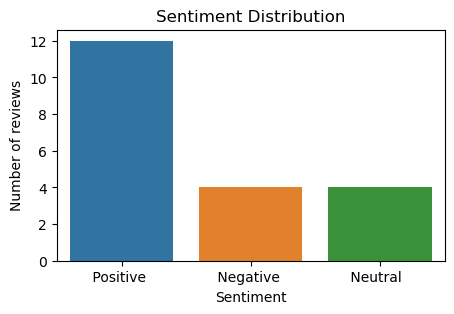

In [29]:
df1=df.head(20)

plt.figure(figsize=(5,3))
sns.countplot(x='Sentiment',data=df1,order=df1['Sentiment'].value_counts().index)
plt.title("Sentiment Distribution")
plt.xlabel('Sentiment')
#plt.xticks(rotation=45) 
plt.ylabel('Number of reviews')
plt.show()

In [33]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/300.2 kB 825.8 kB/s eta 0:00:01
   ------------------------------ --------- 225.3/300.2 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.7 MB/s eta 0:00:00


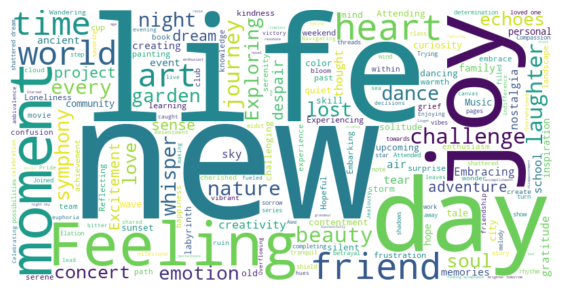

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter positive reviews
positive_reviews = df1[df1['Sentiment'] == 'Positive']


text = ' '.join(df['Text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(7,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


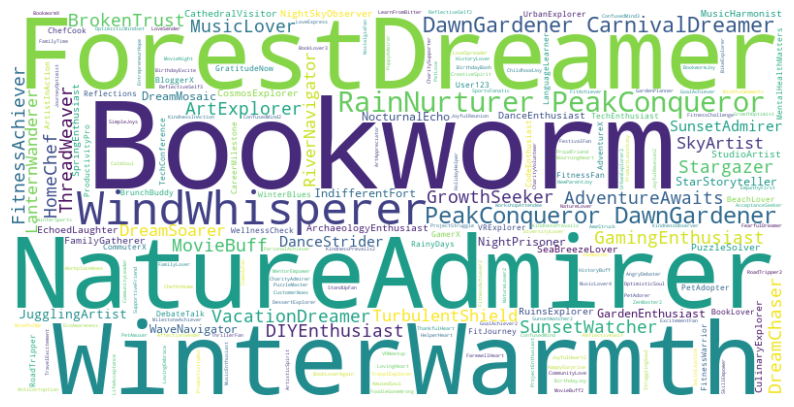

In [12]:
user = ' '.join(df['User'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(user)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

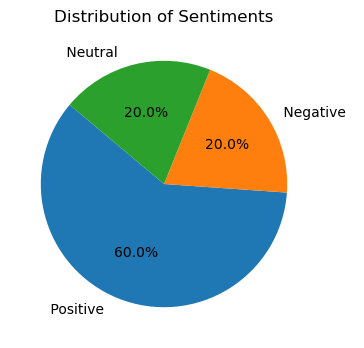

In [13]:
sentiment_counts = df1['Sentiment'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(sentiment_counts,labels=sentiment_counts.index,autopct='%1.1f%%',startangle=140)
plt.title('Distribution of Sentiments')
plt.show()

In [50]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gauri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

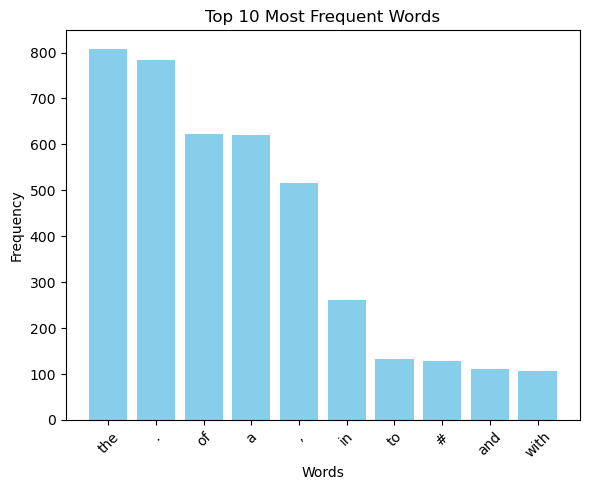

In [33]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

text = ' '.join(df['Text'])

# Tokenize the text
tokens = word_tokenize(text)

# Count the frequency of each word
word_freq = Counter(tokens)

# Get the top 10 most frequent words
top_words = word_freq.most_common(10)

# Extract words and their frequencies
words = [word[0] for word in top_words]
freqs = [word[1] for word in top_words]

# Plot the bar graph
plt.figure(figsize=(6,5))
plt.bar(words, freqs, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\gauri\AppData\Local\Temp\ipykernel_14568\2455757626.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


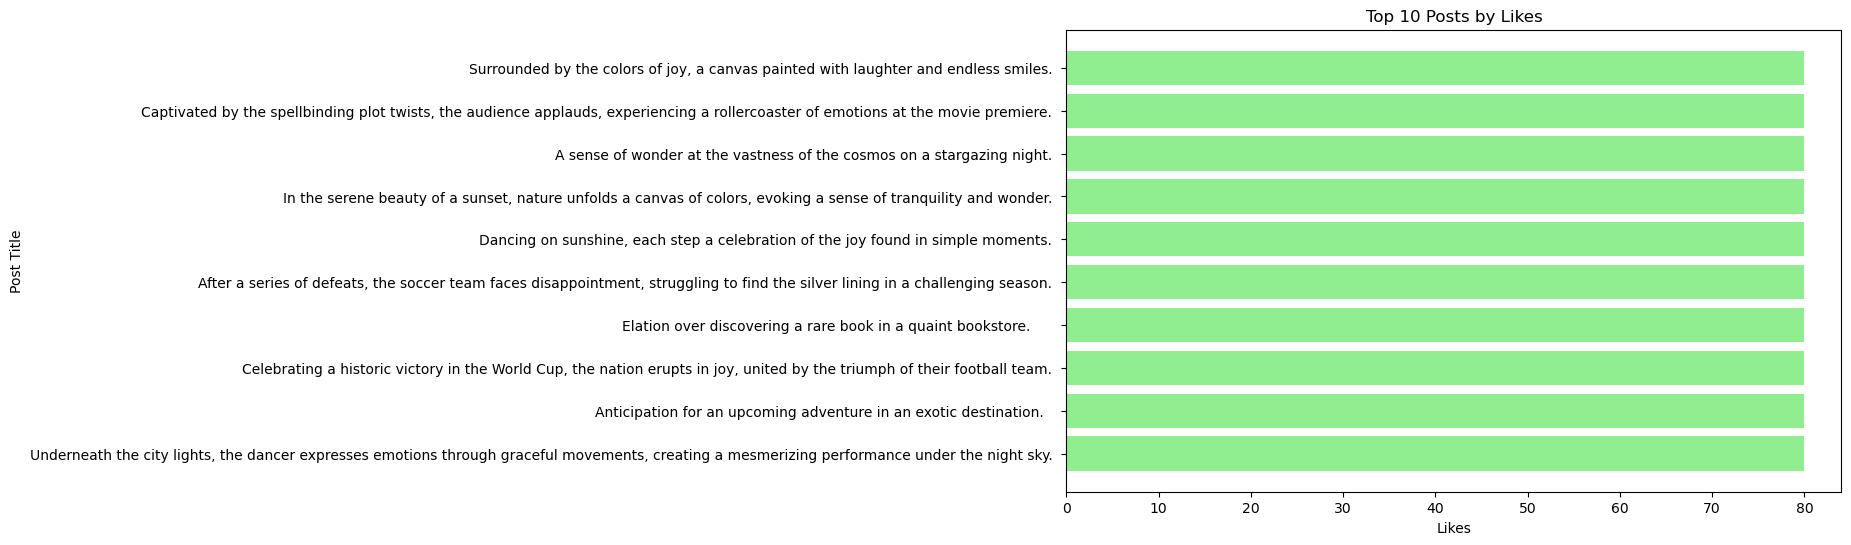

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('sentimentdataset.csv')

# Sort the dataset by the 'likes' column in descending order
df_sorted = df.sort_values(by='Likes', ascending=False)

# Get the top 10 posts by likes
top_10_posts = df_sorted.head(10)

# Extract post titles and their corresponding likes
post_titles = top_10_posts['Text']
likes = top_10_posts['Likes']

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.barh(post_titles, likes, color='lightgreen')
plt.xlabel('Likes')
plt.ylabel('Post Title')
plt.title('Top 10 Posts by Likes')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest likes on top
plt.tight_layout()
plt.show()


In [25]:
import plotly.express as px

fig=px.treemap(df.head(50),path=['Text'],title='Tree map')
fig.show()

In [26]:
fig = px.pie(df1,names='Hashtags',hole=0.4,title='Donut plot')
fig.show()